# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [5]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [6]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [197]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
import scipy.cluster.hierarchy as shc
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler, normalize


from sklearn.cluster import DBSCAN
from sklearn import metrics


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture



from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.spatial.distance import cdist

%matplotlib inline


In [8]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



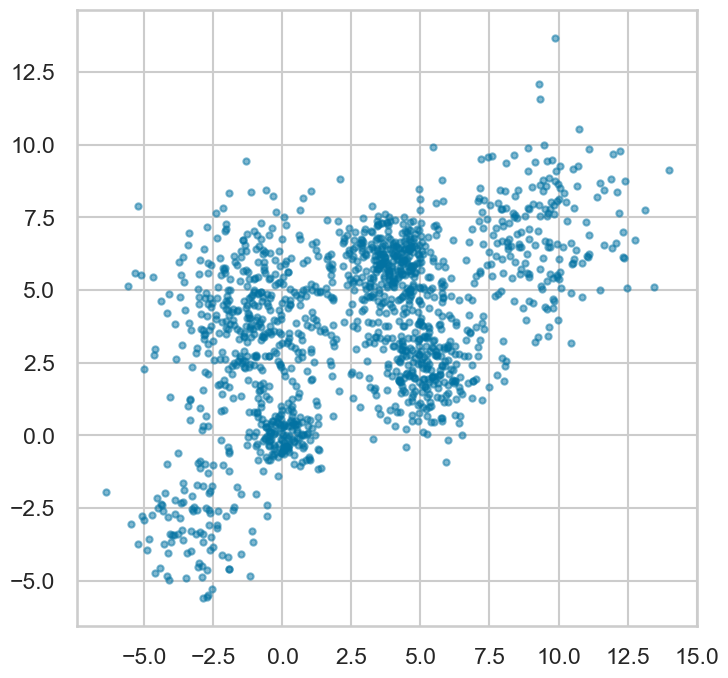

In [9]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [10]:
#data is represented as a set of points, each point is an index in the DataSet array.
DataSet=Multi_blob_Data.copy()
DataSet

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [11]:
len(DataSet)


1450

Since size of the data is 1450 (data set has 1450 point) so th maximum number of clusters is 1450

## Elbow method

To get the optimum K value, the elbow method will be performed

In [12]:
inertias=[] #Inertia is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(DataSet)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,20), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
    

Based on the elbow method the optimum number of clusters is 5

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(DataSet)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=kmeans.labels_)
plt.show()

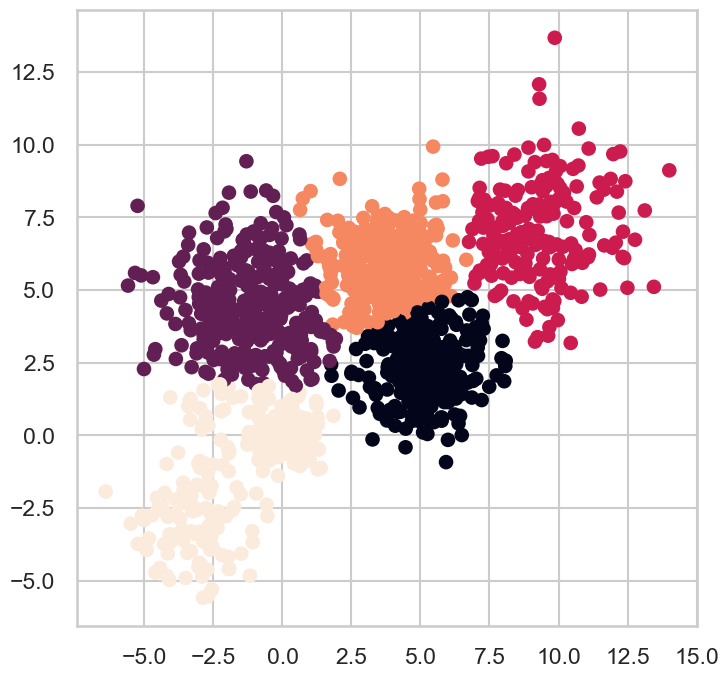

In [14]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(DataSet)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=kmeans.labels_)
plt.show()

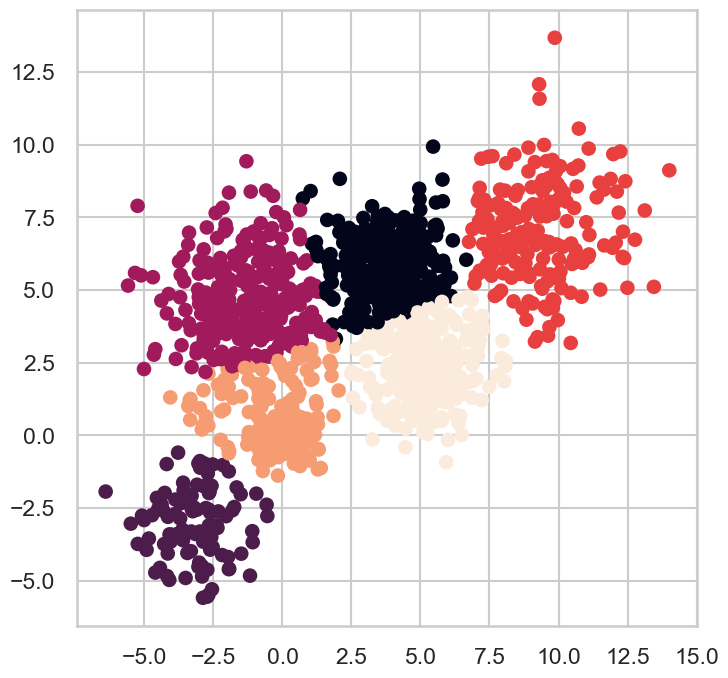

In [15]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(DataSet)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=kmeans.labels_)
plt.show()

In [16]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(DataSet)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=kmeans.labels_)
plt.show()

## Distortion

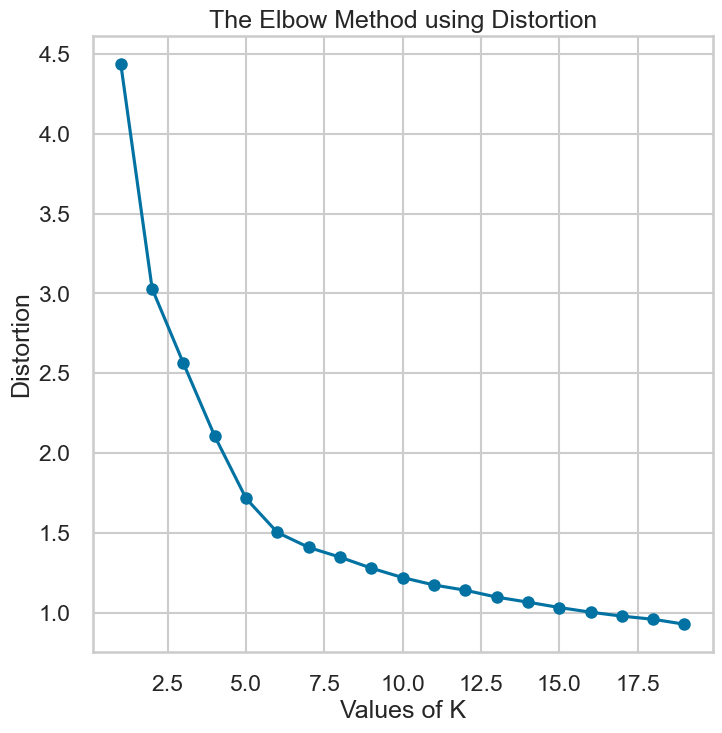

In [17]:
distortions = [] #Distortion is the average of the squared distances from the cluster centers of the respective clusters.
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(DataSet)
    distortions.append(sum(np.min(cdist(DataSet, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / DataSet.shape[0])
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()
   

The results show the same graph as that of the elbow method and signifies that starting K=5 the distortion and intertia change is small

## Silhouette analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters 

In [18]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(DataSet)
score = silhouette_score(DataSet, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.475


In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(DataSet)
score = silhouette_score(DataSet, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.463


In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(DataSet)
score = silhouette_score(DataSet, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.481


In [21]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(DataSet)
score = silhouette_score(DataSet, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.463


In [22]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(DataSet)
score = silhouette_score(DataSet, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.394


[0.4751544541991239, 0.4364841244130465, 0.4628725400351352, 0.48100602217073096, 0.4859737366910219, 0.46353256124446773, 0.4437182374937874, 0.4522744352759398]


Text(0, 0.5, 'silhouette score')

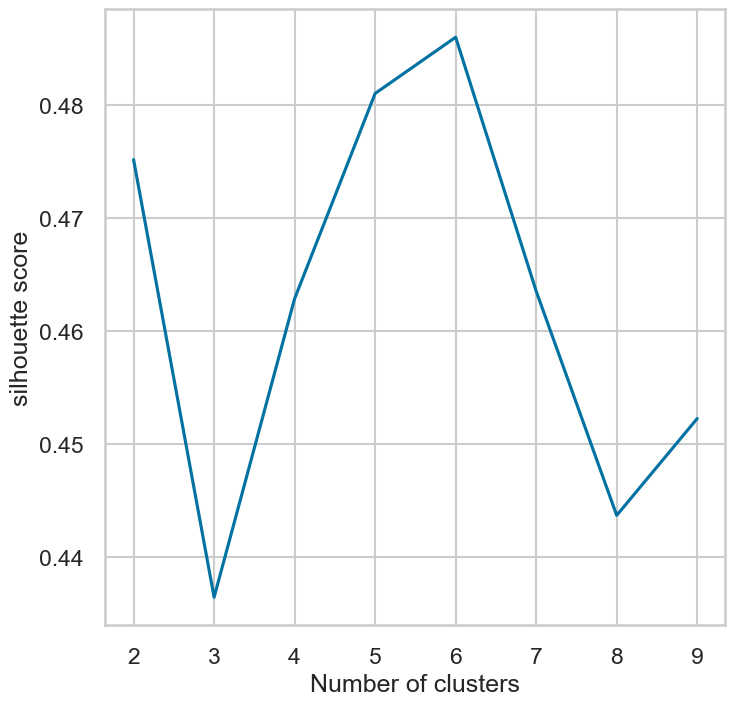

In [215]:
scores=[]
clusters=list(range(2,10))
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kfit=kmeans.fit(DataSet)
    center=kmeans.cluster_centers_
    score = silhouette_score(DataSet, kmeans.labels_, metric='euclidean')
    scores.append(score)
plt.plot(clusters,scores)
print(scores)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [28]:
DataSet2=Multi_blob_Data.copy()

## Agglomerative Clustering


 Affinity can be either euclidean, manhattan or cosine
 Linkage can be single or average

### Using Euclidean distance and average linkage 

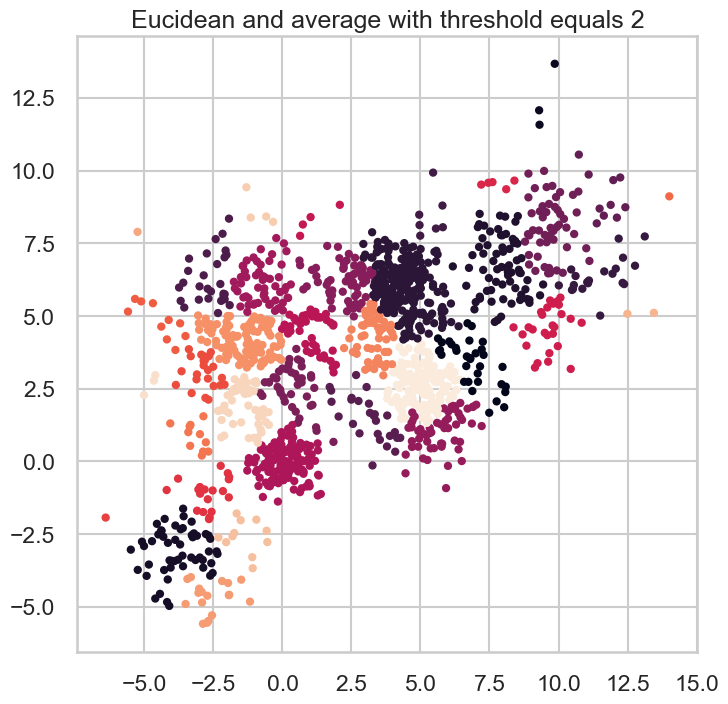

In [89]:
Euclidean_average_clustering2= AgglomerativeClustering(distance_threshold=2, n_clusters=None,compute_full_tree=True, affinity='euclidean', linkage='average') #ward means euclidean
labels=Euclidean_average_clustering2.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labels, s=20)
plt.title('Eucidean and average with threshold equals 2')
plt.show()



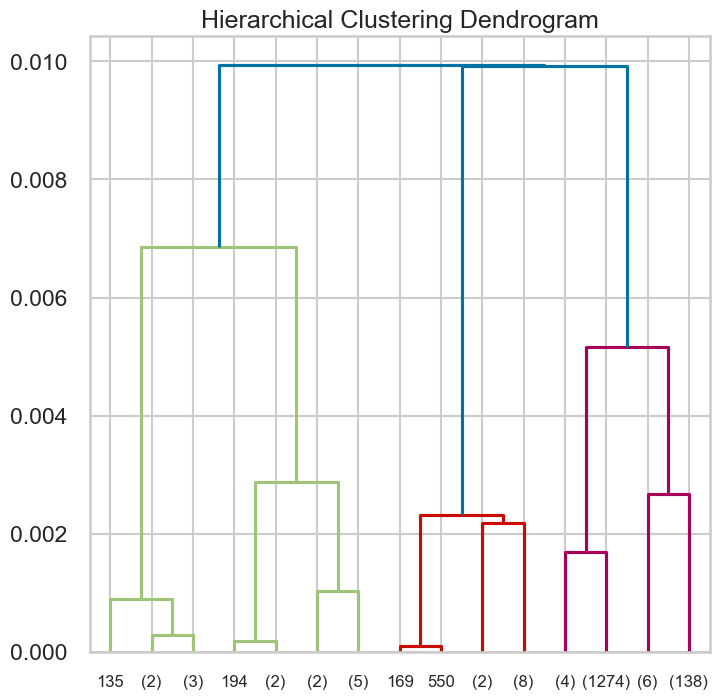

In [216]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(Euclidean_average_clustering.children_.shape[0])
    n_samples = len(Euclidean_average_clustering.labels_)
    for i, merge in enumerate(Euclidean_average_clustering.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [Euclidean_average_clustering.children_, Euclidean_average_clustering.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
#X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(Euclidean_average_clustering2, truncate_mode="level", p=3)
plt.show()

In [99]:
V=Euclidean_average_clustering2

score = silhouette_score(DataSet2, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.316


In [100]:
V=Euclidean_average_clustering4

score = silhouette_score(DataSet2, labels4, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.374


In [101]:
V=Euclidean_average_clustering6

score = silhouette_score(DataSet2, labels6, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.431


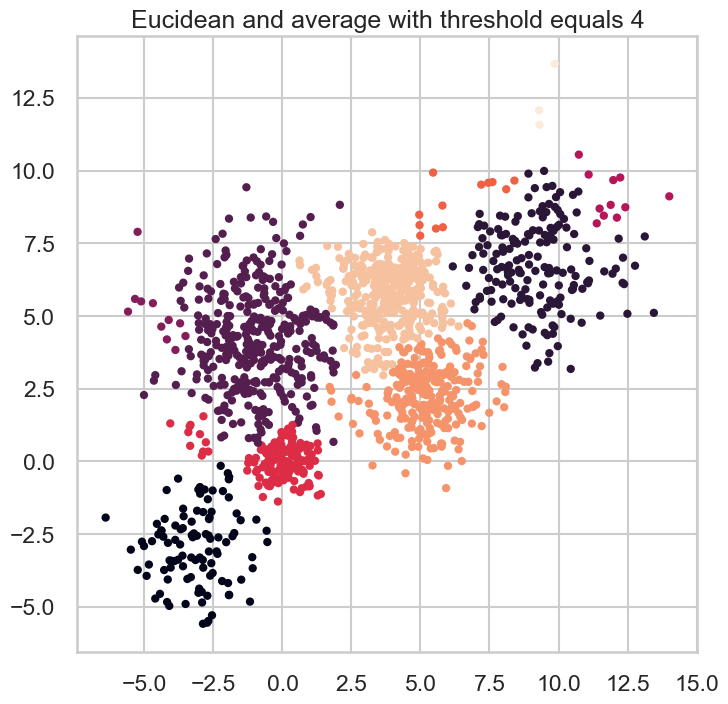

In [80]:
Euclidean_average_clustering4= AgglomerativeClustering(distance_threshold=4, n_clusters=None,compute_full_tree=True, affinity='euclidean', linkage='average') #ward means euclidean
labels4=Euclidean_average_clustering4.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labels4, s=20)
plt.title('Eucidean and average with threshold equals 4')
plt.show()

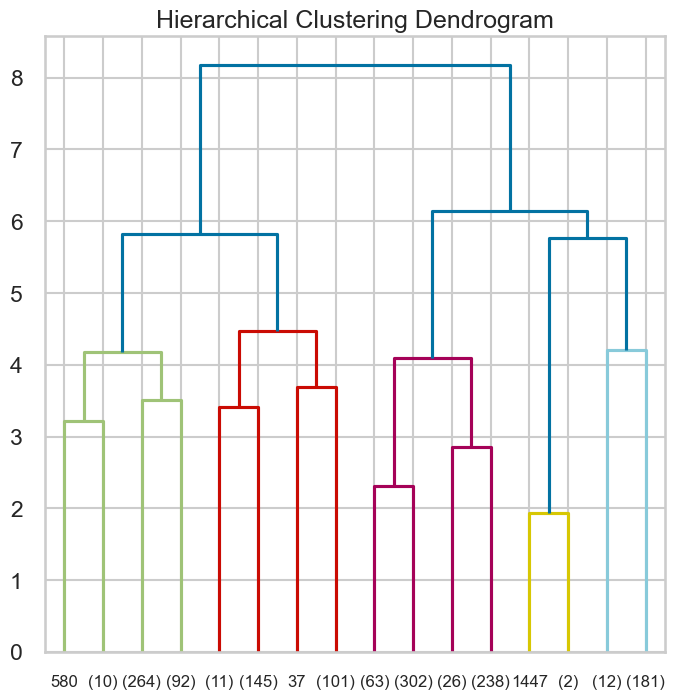

In [83]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(Euclidean_average_clustering4.children_.shape[0])
    n_samples = len(Euclidean_average_clustering4.labels_)
    for i, merge in enumerate(Euclidean_average_clustering4.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [Euclidean_average_clustering4.children_, Euclidean_average_clustering4.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
#X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(Euclidean_average_clustering4, truncate_mode="level", p=3)
plt.show()

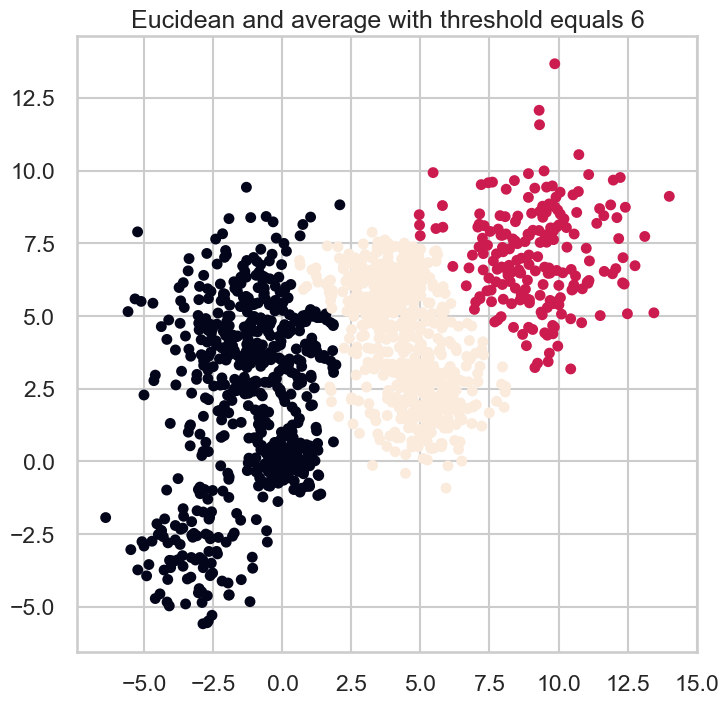

In [84]:
Euclidean_average_clustering6= AgglomerativeClustering(distance_threshold=6, n_clusters=None,compute_full_tree=True, affinity='euclidean', linkage='average') #ward means euclidean
labels6=Euclidean_average_clustering6.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labels6, s=40)
plt.title('Eucidean and average with threshold equals 6')
plt.show()

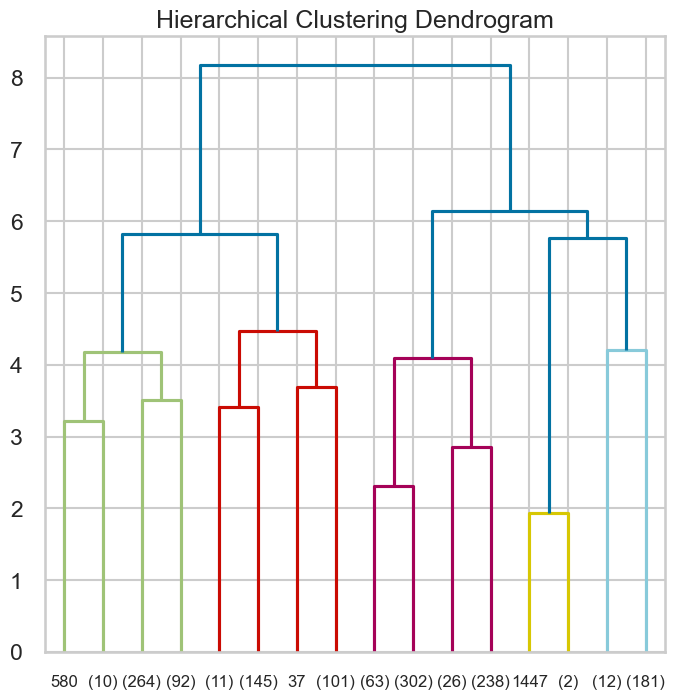

In [86]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(Euclidean_average_clustering6.children_.shape[0])
    n_samples = len(Euclidean_average_clustering6.labels_)
    for i, merge in enumerate(Euclidean_average_clustering6.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [Euclidean_average_clustering6.children_, Euclidean_average_clustering6.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
#X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(Euclidean_average_clustering6, truncate_mode="level", p=3)
plt.show()

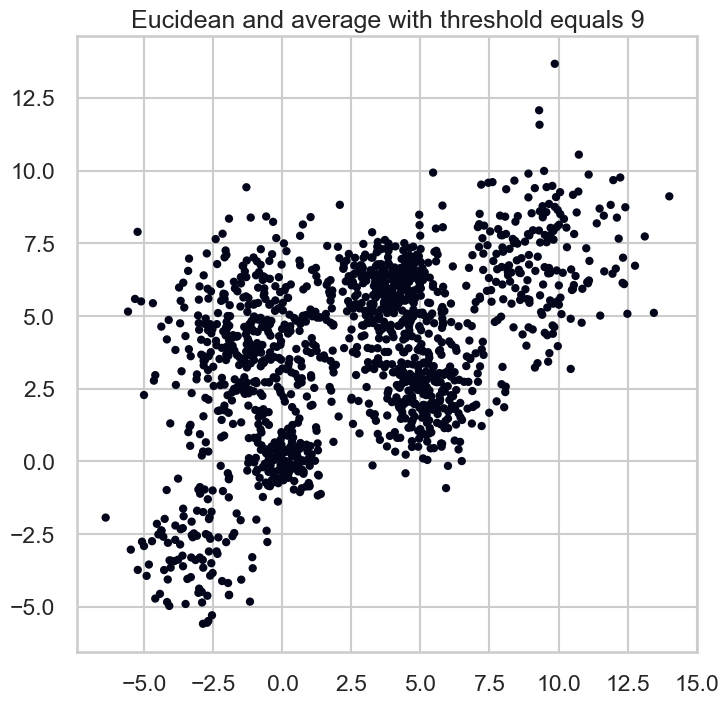

In [87]:
Euclidean_average_clustering9= AgglomerativeClustering(distance_threshold=9, n_clusters=None,compute_full_tree=True, affinity='euclidean', linkage='average') #ward means euclidean
labels9=Euclidean_average_clustering9.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labels9, s=20)
plt.title('Eucidean and average with threshold equals 9')
plt.show()

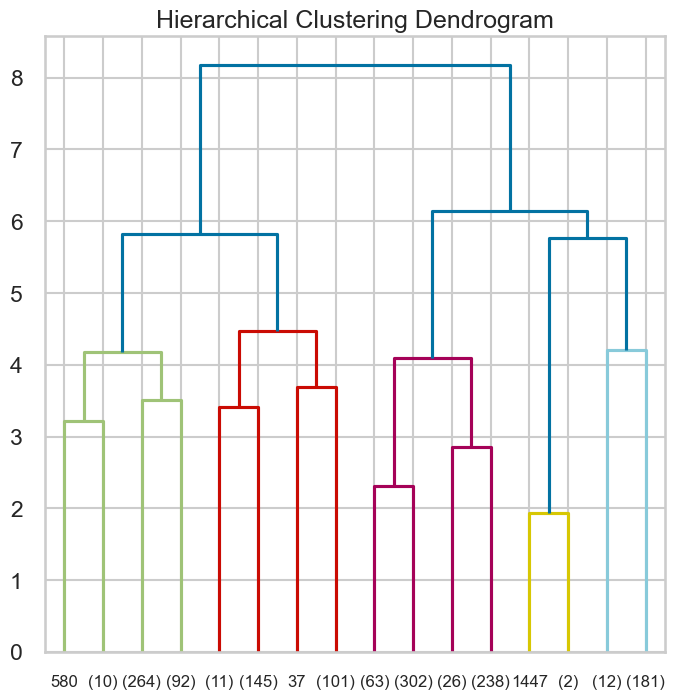

In [88]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(Euclidean_average_clustering9.children_.shape[0])
    n_samples = len(Euclidean_average_clustering9.labels_)
    for i, merge in enumerate(Euclidean_average_clustering9.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [Euclidean_average_clustering9.children_, Euclidean_average_clustering9.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
#X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(Euclidean_average_clustering9, truncate_mode="level", p=3)
plt.show()

### Using Euclidean distance and single link

In [112]:
V=Euclidean_Single_clustering2

score = silhouette_score(DataSet2, labelsE2, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.322


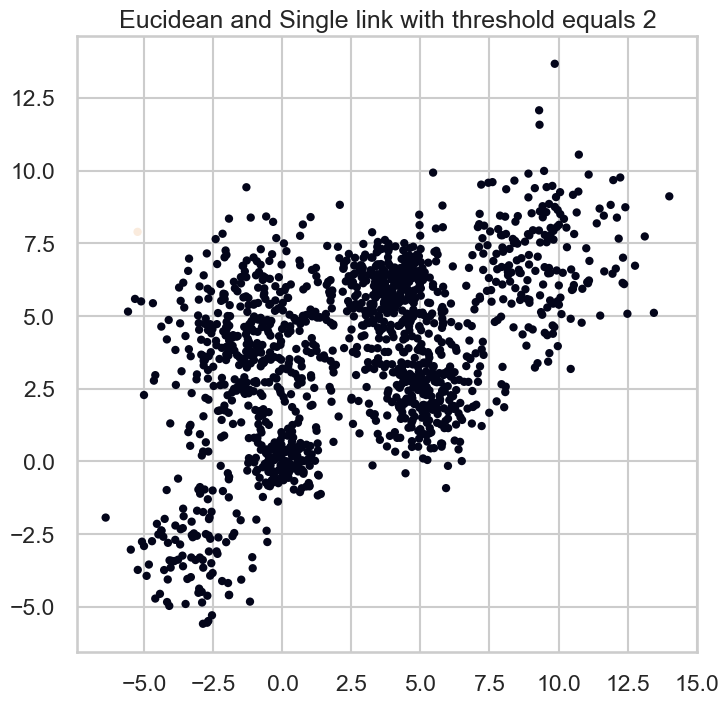

In [111]:
Euclidean_Single_clustering2= AgglomerativeClustering(distance_threshold=2, n_clusters=None,compute_full_tree=True, affinity='euclidean', linkage='single') #ward means euclidean
labelsE2=Euclidean_Single_clustering2.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsE2, s=20)
plt.title('Eucidean and Single link with threshold equals 2')
plt.show()

Text(0.5, 1.0, 'Eucidean and Single link with threshold equals 6')

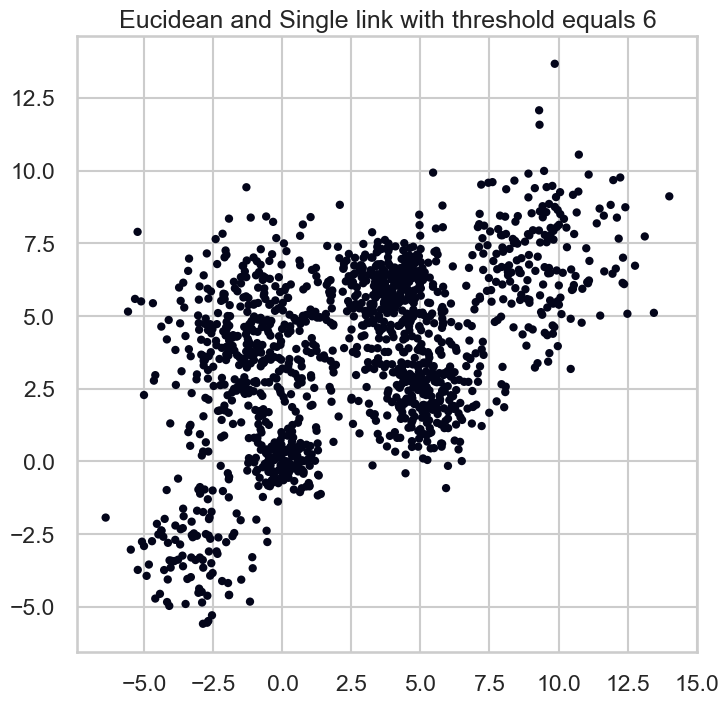

In [113]:
Euclidean_single_clustering6= AgglomerativeClustering(distance_threshold=6, n_clusters=None,compute_full_tree=True, affinity='euclidean', linkage='single') #ward means euclidean
labelsE6=Euclidean_single_clustering6.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labels6, s=20)
plt.title('Eucidean and Single link with threshold equals 6')

In [117]:
V=Euclidean_single_clustering1

score = silhouette_score(DataSet2, labelsE1, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.149


Text(0.5, 1.0, 'Eucidean and Sinle link with threshold equals 1')

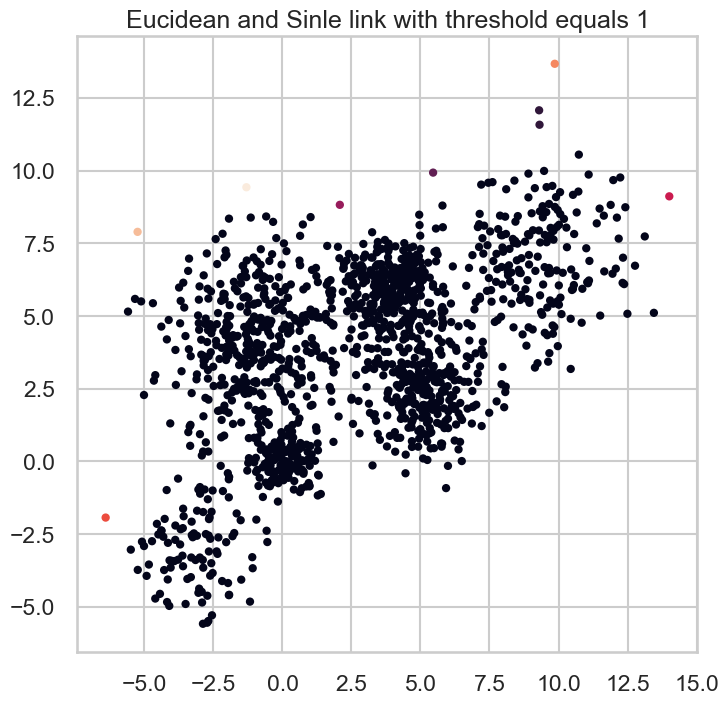

In [116]:
Euclidean_single_clustering1= AgglomerativeClustering(distance_threshold=1, n_clusters=None,compute_full_tree=True, affinity='euclidean', linkage='single') #ward means euclidean
labelsE1=Euclidean_single_clustering1.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsE1, s=20)
plt.title('Eucidean and Sinle link with threshold equals 1')

### Using Manhattan distance and average linkage

In [122]:
V=Manhattan_average_clustering

score = silhouette_score(DataSet2, labelsA2, metric='manhattan')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.277


Text(0.5, 1.0, 'Manhattan and average link with threshold equals 2')

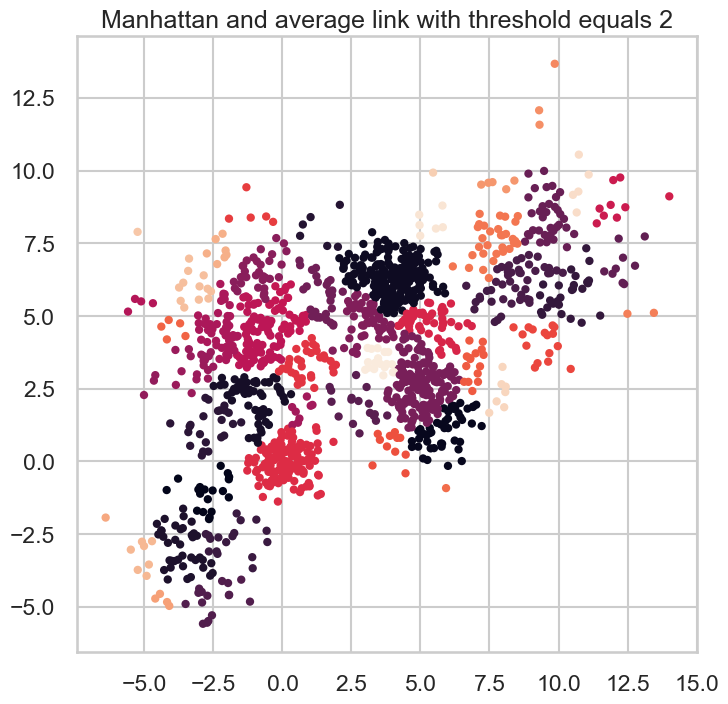

In [123]:
Manhattan_average_clustering= AgglomerativeClustering(distance_threshold=2, n_clusters=None,compute_full_tree=True, affinity='manhattan', linkage='average') #ward means euclidean
labelsA2=Manhattan_average_clustering.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsA2, s=20)
plt.title('Manhattan and average link with threshold equals 2')

In [125]:
score = silhouette_score(DataSet2, labelsA6, metric='manhattan')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.391


In [124]:
manhattan_average_clustering6= AgglomerativeClustering(distance_threshold=6, n_clusters=None,compute_full_tree=True, affinity='manhattan', linkage='average') #ward means euclidean
labelsA6=manhattan_average_clustering6.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsA6, s=20)
plt.title('Manhattan and average link with threshold equals 6')

Text(0.5, 1.0, 'Manhattan and average link with threshold equals 6')

In [127]:
score = silhouette_score(DataSet2, labelsA9, metric='manhattan')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.421


In [126]:
manhattan_average_clustering9= AgglomerativeClustering(distance_threshold=9, n_clusters=None,compute_full_tree=True, affinity='manhattan', linkage='average') #ward means euclidean
labelsA9=manhattan_average_clustering9.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsA9, s=20)
plt.title('Manhattan and average link with threshold equals 9')

Text(0.5, 1.0, 'Manhattan and average link with threshold equals 9')

In [ ]:
score = silhouette_score(DataSet2, labelsA11, metric='manhattan') #one label so can not get score
print('Silhouetter Score: %.3f' % score)

Text(0.5, 1.0, 'Manhattan and average link with threshold equals 11')

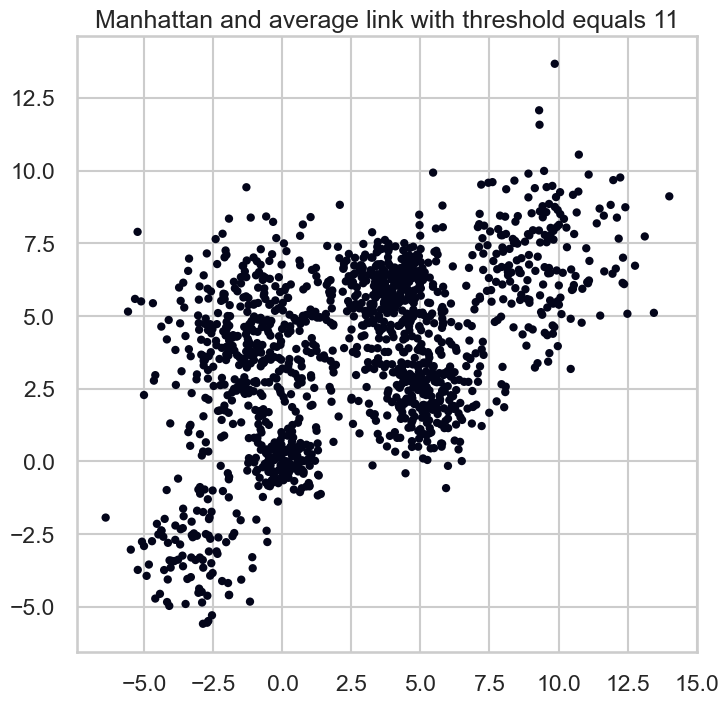

In [128]:
manhattan_average_clustering11= AgglomerativeClustering(distance_threshold=11, n_clusters=None,compute_full_tree=True, affinity='manhattan', linkage='average') #ward means euclidean
labelsA11=manhattan_average_clustering11.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsA11, s=20)
plt.title('Manhattan and average link with threshold equals 11')

### Using Manhattan distance and single link

In [131]:
score = silhouette_score(DataSet2, labelsS2, metric='manhattan') 
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.138


Text(0.5, 1.0, 'Manhattan and Single link with threshold equals 2')

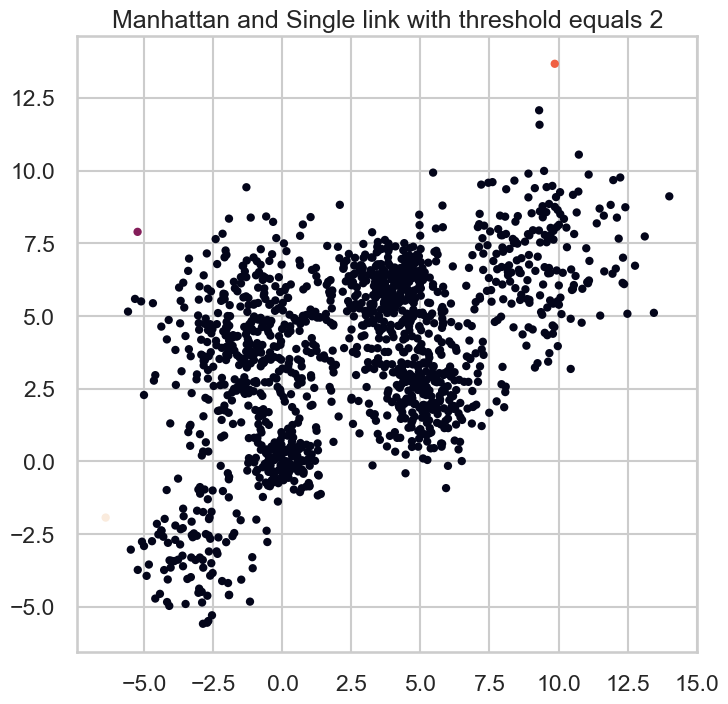

In [130]:
manhattan_single_clustering= AgglomerativeClustering(distance_threshold=2, n_clusters=None,compute_full_tree=True, affinity='manhattan', linkage='single') #ward means euclidean
labelsS2=manhattan_single_clustering.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsS2, s=20)
plt.title('Manhattan and Single link with threshold equals 2')

In [133]:
score = silhouette_score(DataSet2, labelsS1, metric='manhattan') 
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.138


Text(0.5, 1.0, 'Manhattan and Single link with threshold equals 1')

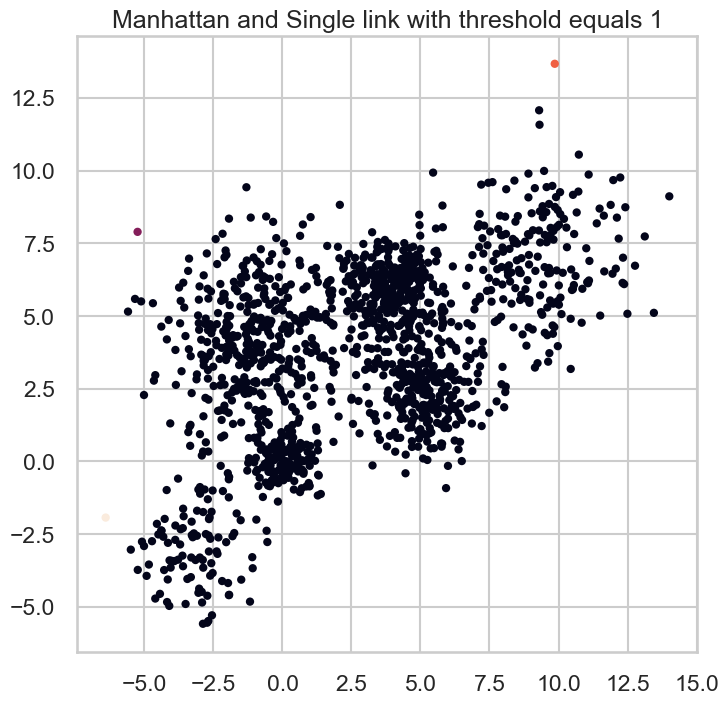

In [132]:
manhattan_single_clustering1= AgglomerativeClustering(distance_threshold=1, n_clusters=None,compute_full_tree=True, affinity='manhattan', linkage='single') #ward means euclidean
labelsS1=manhattan_single_clustering.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsS1, s=20)
plt.title('Manhattan and Single link with threshold equals 1')

### Using Cosine distance and average

In [ ]:
score = silhouette_score(DataSet2, labelsA11, metric='cosine') #one label so can not get score
print('Silhouetter Score: %.3f' % score)

Text(0.5, 1.0, 'Cosine and average link with threshold equals 2')

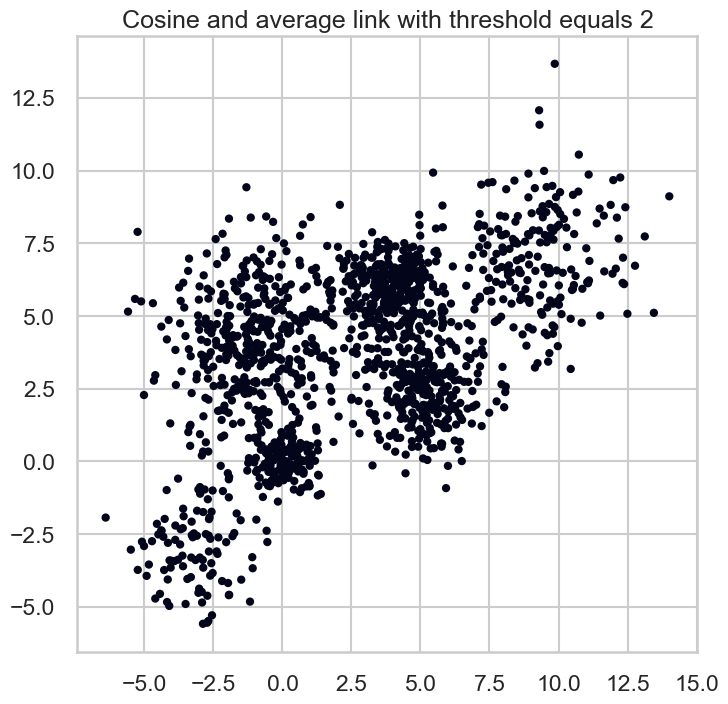

In [134]:
Cosine_average_clustering= AgglomerativeClustering(distance_threshold=2, n_clusters=None,compute_full_tree=True, affinity='cosine', linkage='average') #ward means euclidean
labelsC1=Cosine_average_clustering.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsC1, s=20)
plt.title('Cosine and average link with threshold equals 2')

In [ ]:
score = silhouette_score(DataSet2, labelsA11, metric='cosine') #one label so can not get score
print('Silhouetter Score: %.3f' % score)

Text(0.5, 1.0, 'Cosine and average link with threshold equals 1')

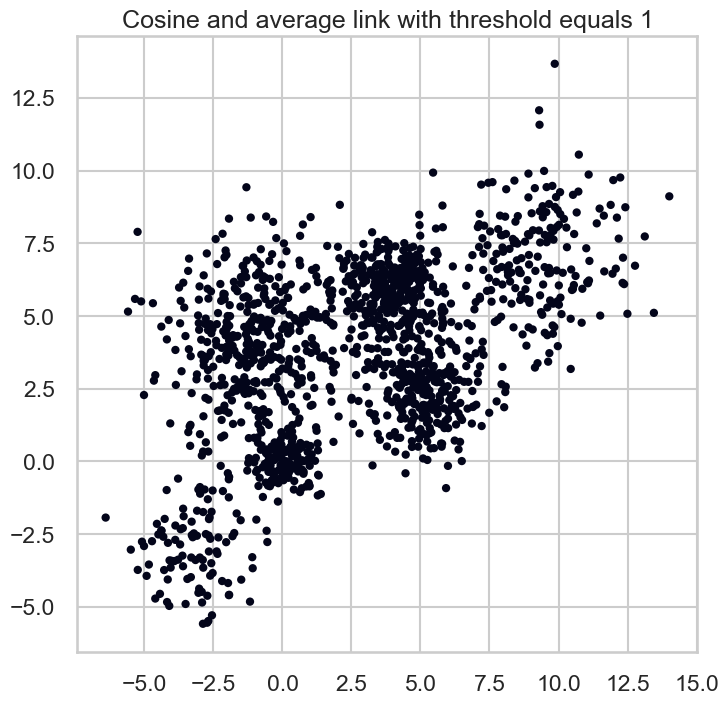

In [136]:
Cosine_average_clustering2= AgglomerativeClustering(distance_threshold=2, n_clusters=None,compute_full_tree=True, affinity='cosine', linkage='average') #ward means euclidean
labelsC2=Cosine_average_clustering2.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsC2, s=20)
plt.title('Cosine and average link with threshold equals 1')

### Using Cosine distance and single link

In [ ]:
score = silhouette_score(DataSet2, labelsCS1, metric='cosine') #one label so can not get score
print('Silhouetter Score: %.3f' % score)

In [141]:
Cosine_single_clustering= AgglomerativeClustering(distance_threshold=2, n_clusters=None,compute_full_tree=True, affinity='cosine', linkage='single') #ward means euclidean
labelsCS1=Cosine_single_clustering.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labelsCS1, s=20)
plt.title('Cosine and Single link with threshold equals 2')

Text(0.5, 1.0, 'Cosine and Single link with threshold equals 2')

In [72]:
Euclidean_average_clustering= AgglomerativeClustering(distance_threshold=6, n_clusters=None,compute_full_tree=True, affinity='cosine', linkage='single') #ward means euclidean
labels=Euclidean_average_clustering.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labels, s=20)
plt.title('Cosine and Single link with threshold equals 6')

Text(0.5, 1.0, 'Cosine and Single link with threshold equals 6')

Text(0.5, 1.0, 'Cosine and Single link with threshold equals 1')

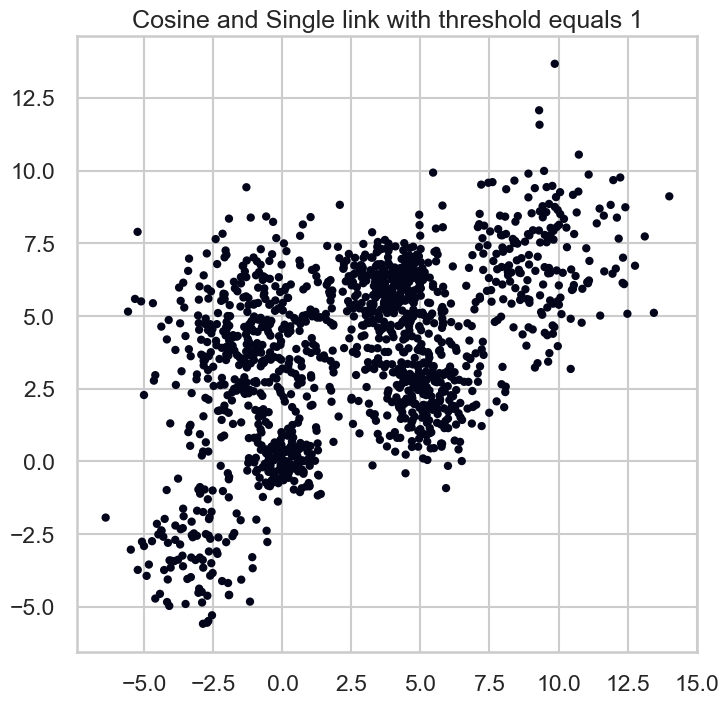

In [73]:
Euclidean_average_clustering= AgglomerativeClustering(distance_threshold=1, n_clusters=None,compute_full_tree=True, affinity='cosine', linkage='single') #ward means euclidean
labels=Euclidean_average_clustering.fit_predict(DataSet2)

plt.scatter(DataSet[:, 0], DataSet[:, 1], c=labels, s=20)
plt.title('Cosine and Single link with threshold equals 1')

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [142]:
DataSet3=Multi_blob_Data.copy()

In [164]:
db1 = DBSCAN(eps=0.5, min_samples=5).fit(DataSet3)
labelsDB = db1.labels_

no_clusters = len(np.unique(labelsDB) )
no_noise = np.sum(np.array(labelsDB) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 11
Estimated no. of noise points: 160


In [187]:
#evaluation metrics
sc = metrics.silhouette_score(DataSet3, labelsDB)
print("Silhouette Coefficient:%0.2f"%sc)

Silhouette Coefficient:-0.07


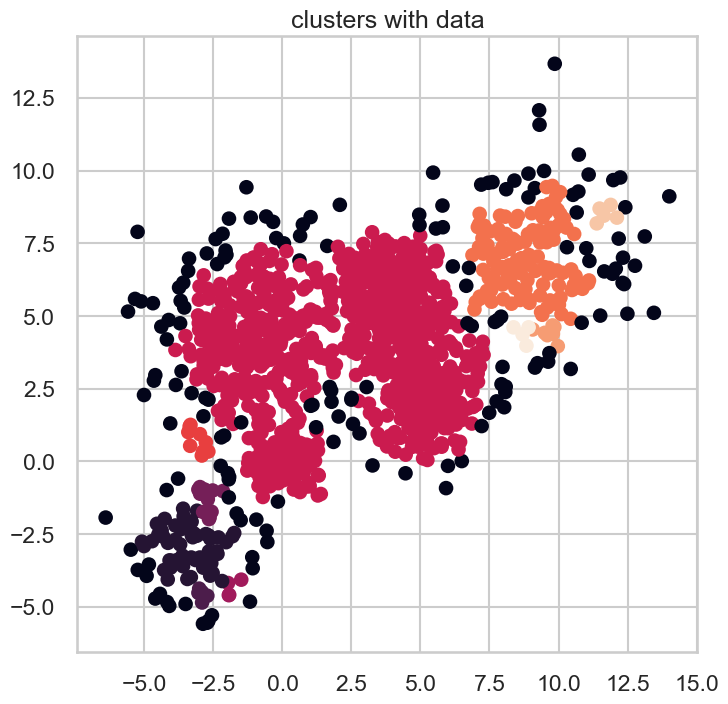

In [173]:

plt.scatter(DataSet3[:,0], DataSet3[:,1], c=labelsDB, marker="o", picker=True)
plt.title('clusters with data')
plt.show()

In [165]:
db2 = DBSCAN(eps=3, min_samples=10).fit(DataSet3)
labelsDB2 = db2.labels_

no_clusters = len(np.unique(labelsDB2) )
no_noise = np.sum(np.array(labelsDB2) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 0


In [ ]:
#evaluation metrics
sc = metrics.silhouette_score(DataSet3, labelsDB2)#one cluster one label so can not get silouette score
print("Silhouette Coefficient:%0.2f"%sc)

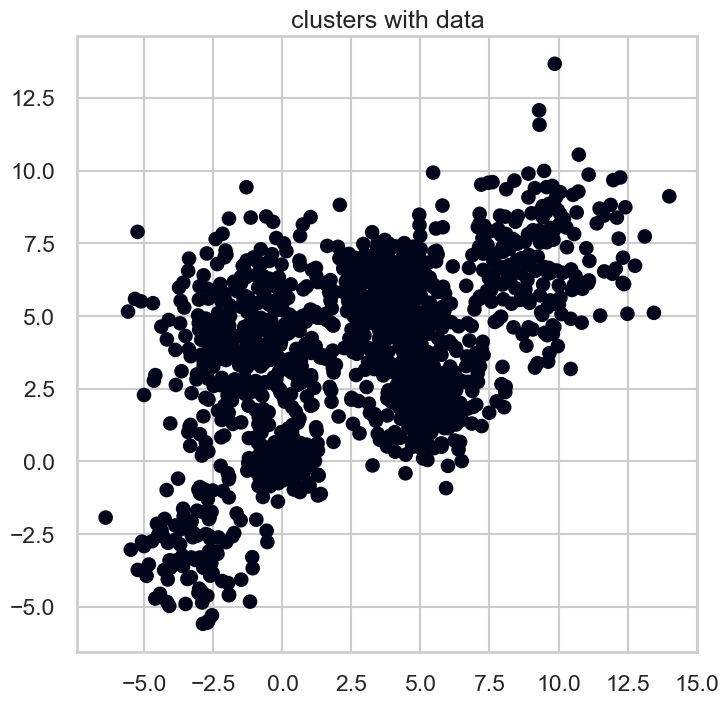

In [189]:
plt.scatter(DataSet3[:,0], DataSet3[:,1], c=db2.labels_, marker="o", picker=True)
plt.title('clusters with data')
plt.show()

In [175]:
db3 = DBSCAN(eps=0.9, min_samples=17).fit(DataSet3)
labelsDB3 = db3.labels_

no_clusters = len(np.unique(labelsDB3) )
no_noise = np.sum(np.array(labelsDB3) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 4
Estimated no. of noise points: 120


In [190]:
#evaluation metrics
sc = metrics.silhouette_score(DataSet3, labelsDB3)
print("Silhouette Coefficient:%0.2f"%sc)

Silhouette Coefficient:0.22


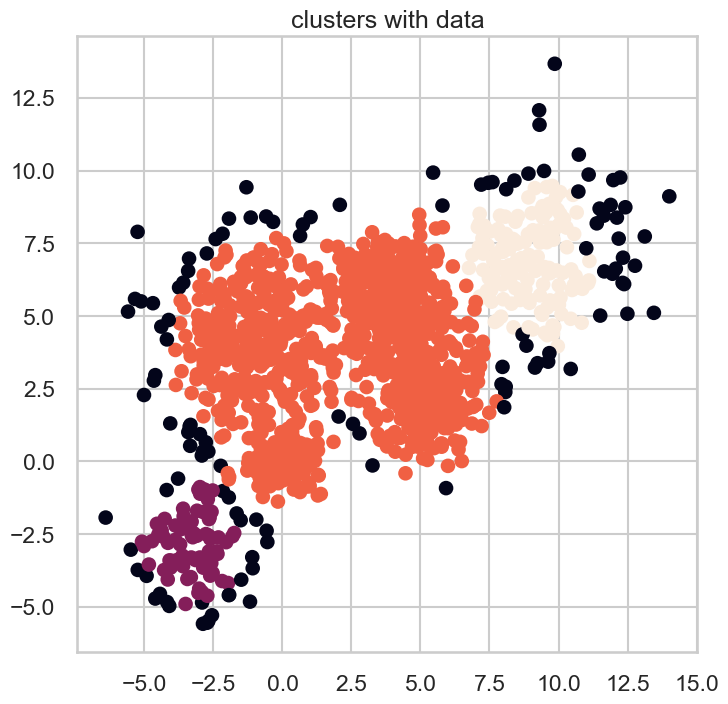

In [179]:
plt.scatter(DataSet3[:,0], DataSet3[:,1], c=db3.labels_, marker="o", picker=True)
plt.title('clusters with data')
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [203]:
DataSet4=Multi_blob_Data.copy()


In [213]:
gmm = GaussianMixture(n_components=4, covariance_type='full').fit(DataSet4) #full means that each component has its own general covariance matrix.
labelsgm = gmm.predict(DataSet4)
plt.scatter( DataSet4[:, 0], DataSet4[:, 1], c=labelsgm, s=40, cmap='viridis');

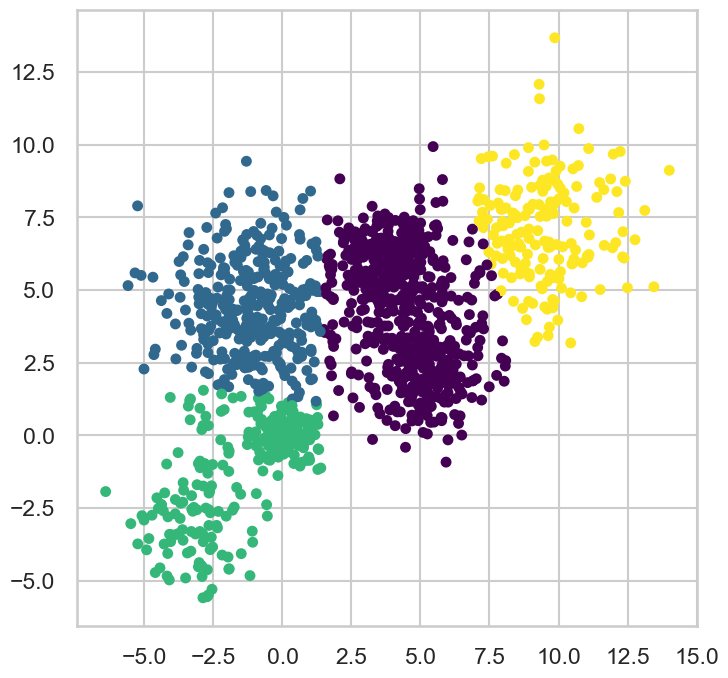

In [204]:
gmm1 = GaussianMixture(n_components=4, covariance_type='tied').fit(DataSet4) # tied means all components share the same general covariance matrix.
labelsgm1 = gmm1.predict(DataSet4)
plt.scatter(DataSet4[:, 0], DataSet4[:, 1], c=labelsgm1, s=40, cmap='viridis');

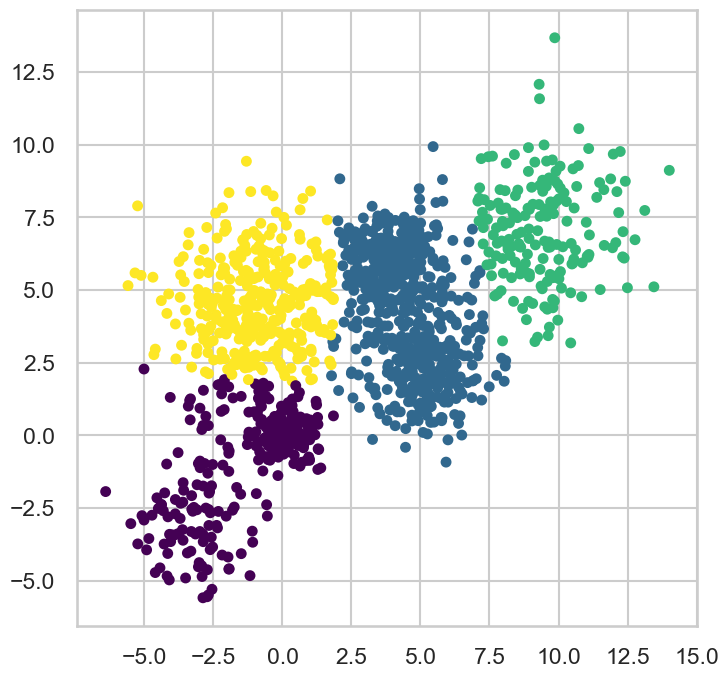

In [205]:
gmm2 = GaussianMixture(n_components=4, covariance_type='diag').fit(DataSet4) # diag means each component has its own diagonal covariance matrix.
labelsgm2 = gmm2.predict(DataSet4)
plt.scatter(DataSet4[:, 0], DataSet4[:, 1], c=labelsgm2, s=40, cmap='viridis');

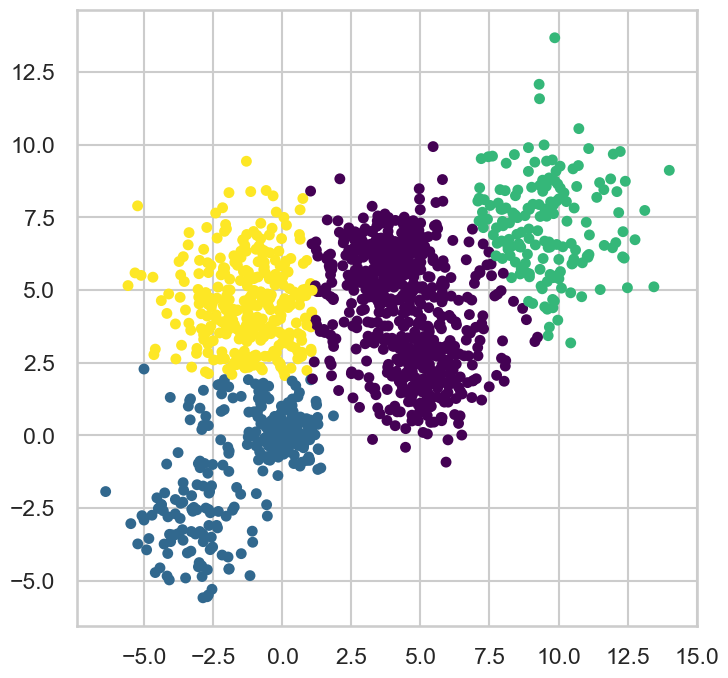

In [214]:
gmm3 = GaussianMixture(n_components=4, covariance_type='spherical').fit(DataSet4) #spherical means each component has its own single variance.
labelsgm3 = gmm3.predict(DataSet4)
plt.scatter(DataSet4[:, 0], DataSet4[:, 1], c=labelsgm3, s=40, cmap='viridis');

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 